## Imports

In [17]:
import pandas as pd
import numpy as np
import joblib
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

## Build model

In [8]:
data = pd.read_csv('train.csv')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data['Pclass'].unique()

array([3, 1, 2])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

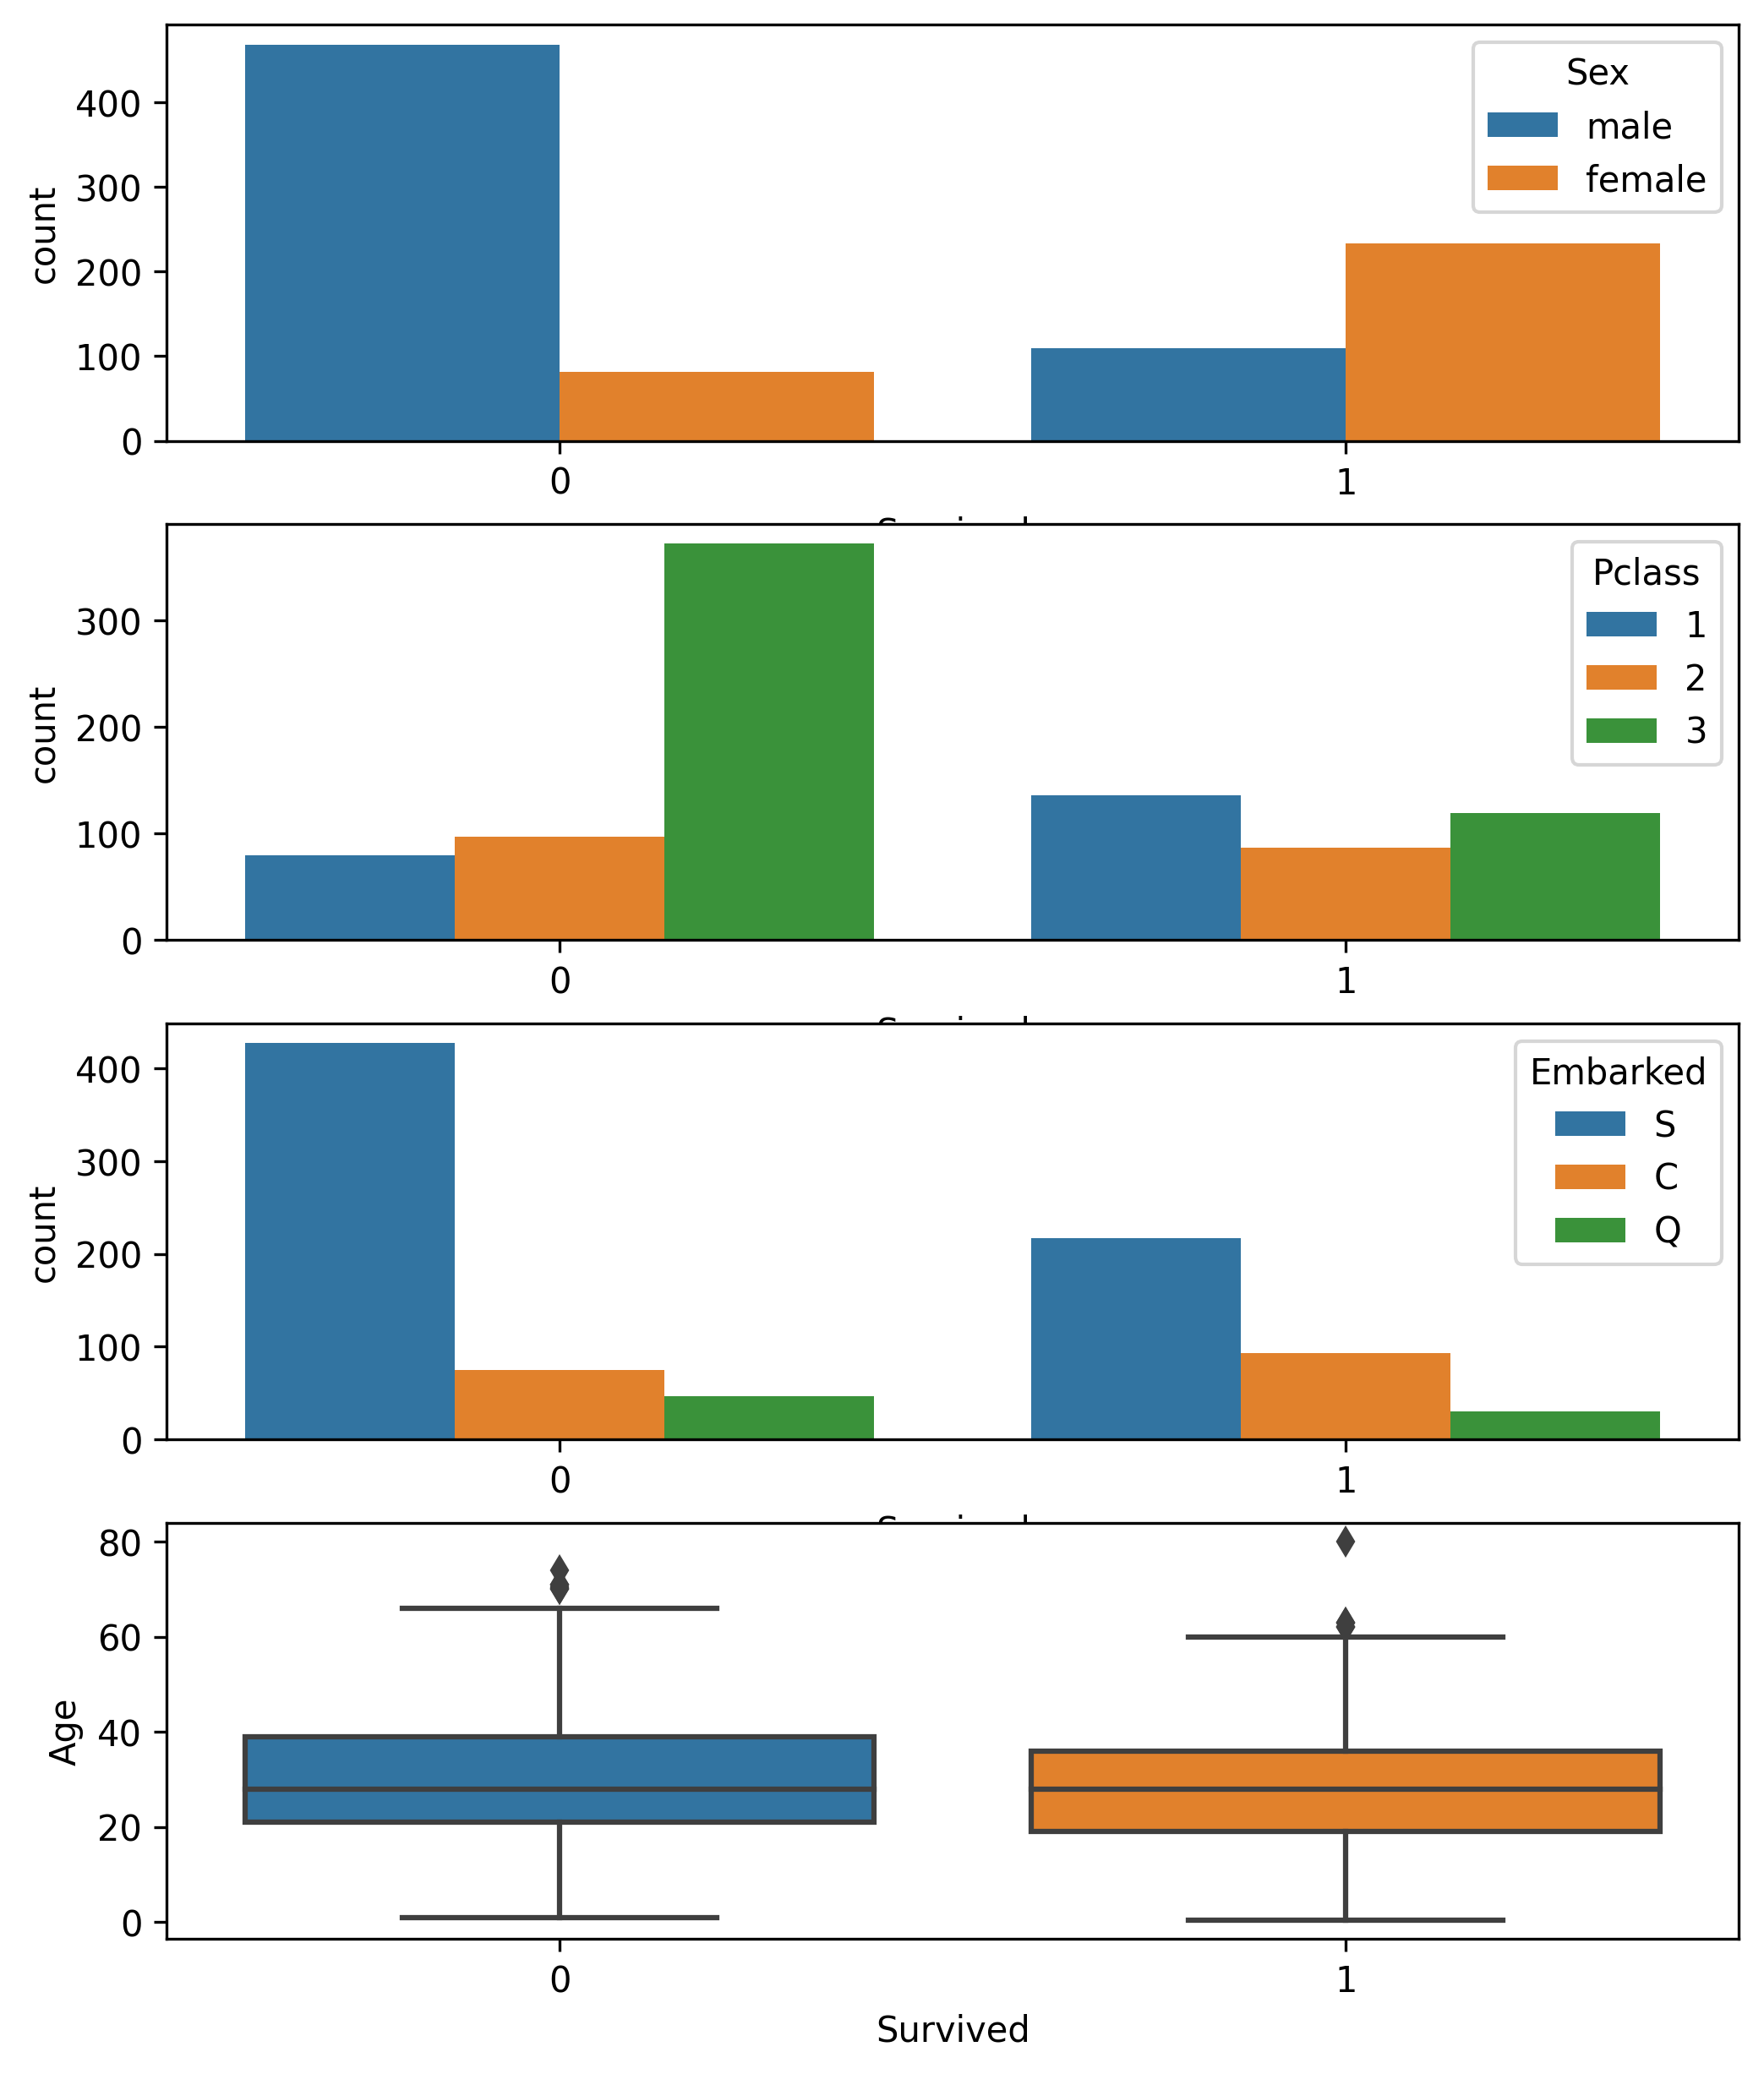

In [30]:
fig2, axes = plt.subplots(nrows=4, ncols=1,figsize=(8, 10), dpi=300)
sns.countplot(data=data, hue='Sex', x='Survived', ax=axes[0])
sns.countplot(data=data, hue='Pclass', x='Survived', ax=axes[1])
sns.countplot(data=data, hue='Embarked', x='Survived', ax=axes[2])
sns.boxplot(data=data, x='Survived', y='Age', ax=axes[3])

In [31]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Cabin"] = data["Cabin"].fillna(data["Cabin"].mode()[0])
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [33]:
data["Sex"] = [1 if i == "male" else 0 for i in data["Sex"]]

In [34]:
data["Embarked"] = [0 if i == "S" else i for i in data["Embarked"]] # S = 0
data["Embarked"] = [1 if i == "C" else i for i in data["Embarked"]] # C = 1
data["Embarked"] = [2 if i == "Q" else i for i in data["Embarked"]] # Q = 2

In [35]:
feature_cols = ["Pclass", "Age", "Sex", "Embarked"]

In [36]:
data.shape

(891, 12)

In [37]:
model = DecisionTreeClassifier(max_depth=3) 
model.fit(data[feature_cols], data["Survived"]) 

DecisionTreeClassifier(max_depth=3)

In [38]:
model.predict_proba(data[feature_cols])[:, 1][:10]

array([0.11547344, 0.95238095, 0.375     , 0.95238095, 0.11547344,
       0.11547344, 0.35833333, 0.42857143, 0.375     , 0.95238095])

In [39]:
data["Survived"][:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [40]:
sample = {
    'Pclass': [1],
    'Age': [38],
    'Sex': [1],
    'Embarked': [1]
}

In [41]:
pd.DataFrame.from_dict(sample)

,Pclass,Age,Sex,Embarked
0,1,38,1,1


In [42]:
data[feature_cols + ['Survived']].iloc[1:2]

,Pclass,Age,Sex,Embarked,Survived
1,1,38.0,0,1,1


In [46]:
model.predict_proba(pd.DataFrame.from_dict(sample))[:, 1][0]

0.35833333333333334

## Show tree

[Text(465.0, 792.75, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Survived'),
 Text(232.5, 566.25, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Died'),
 Text(116.25, 339.75, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Died'),
 Text(58.125, 113.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Survived'),
 Text(174.375, 113.25, 'gini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = Died'),
 Text(348.75, 339.75, 'Embarked <= 0.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = Survived'),
 Text(290.625, 113.25, 'gini = 0.469\nsamples = 88\nvalue = [55, 33]\nclass = Survived'),
 Text(406.875, 113.25, 'gini = 0.423\nsamples = 56\nvalue = [17, 39]\nclass = Died'),
 Text(697.5, 566.25, 'Age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Survived'),
 Text(581.25, 339.75, 'Pclass <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Died'),
 Text(523.125, 113.25, 'gini = 0.0\nsamples = 

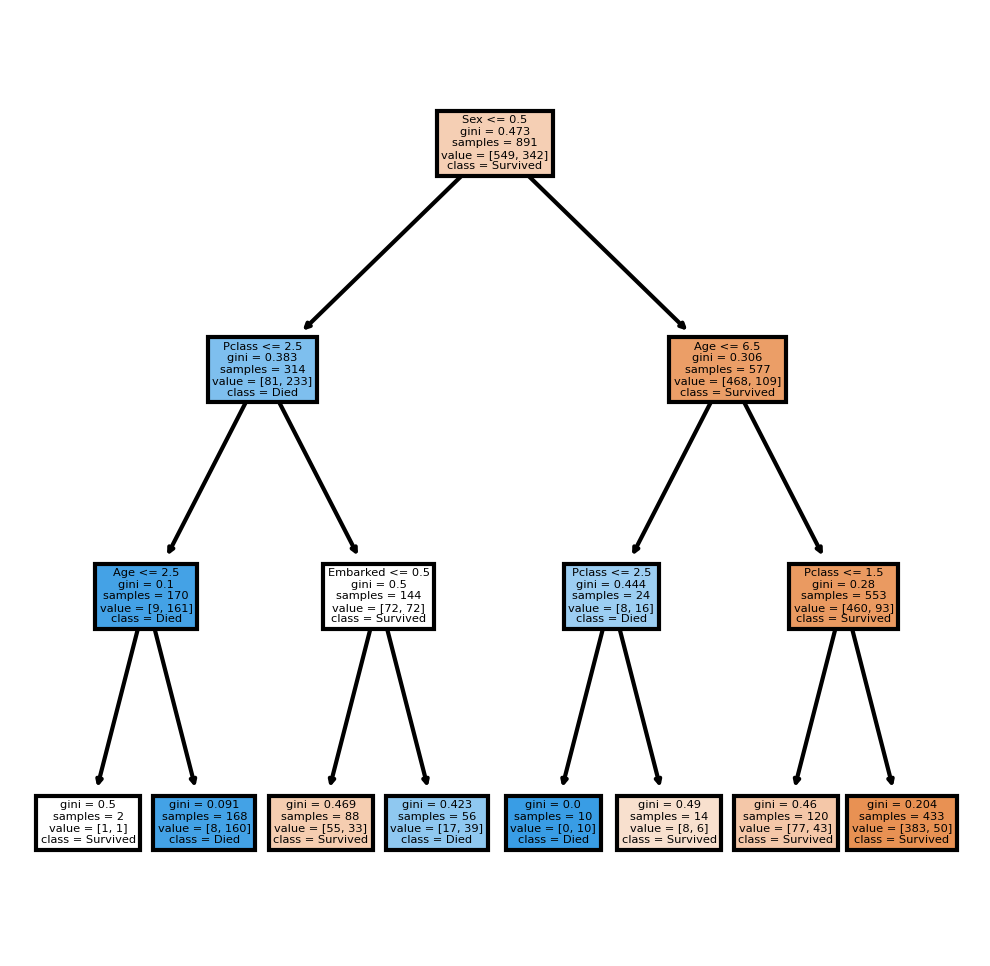

In [44]:
fn = feature_cols
cn = ['Survived', 'Died']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,
         )

## Dump model

In [45]:
joblib.dump(model, 'model.sav')

['model.sav']